In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/xfiles/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/MachineLearning/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
dataset = pd.read_csv('/MachineLearning/input/50_Startups.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/MachineLearning/input/50_Startups.csv'

In [4]:
import pandas as pd
import os
os.getcwd()

'C:\\Users\\FORMULATRIX\\Documents\\Python Scripts'

In [5]:
dataset = pd.read_csv('/MachineLearning/input/50_Startups.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/MachineLearning/input/50_Startups.csv'

In [6]:
dataset = pd.read_csv(r'C:\Users\FORMULATRIX\Documents\Python Scripts\MachineLearning\input\50_Startups')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\FORMULATRIX\\Documents\\Python Scripts\\MachineLearning\\input\\50_Startups'

In [7]:
import pandas as pd
import os
os.getcwd()

'C:\\Users\\FORMULATRIX\\Documents\\Python Scripts'

In [8]:
dataset = pd.read_csv('50_Startups.csv')

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
dataset = pd.read_csv('50_Startups.csv')

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


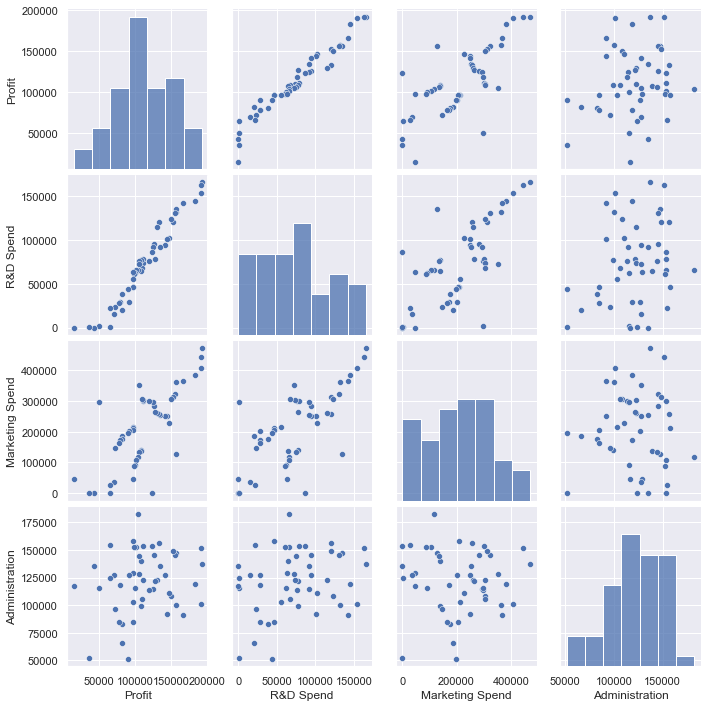

In [12]:
sns.set()
cols = ['Profit', 'R&D Spend', 'Marketing Spend', 'Administration']
sns.pairplot(dataset[cols], height = 2.5)
plt.show();

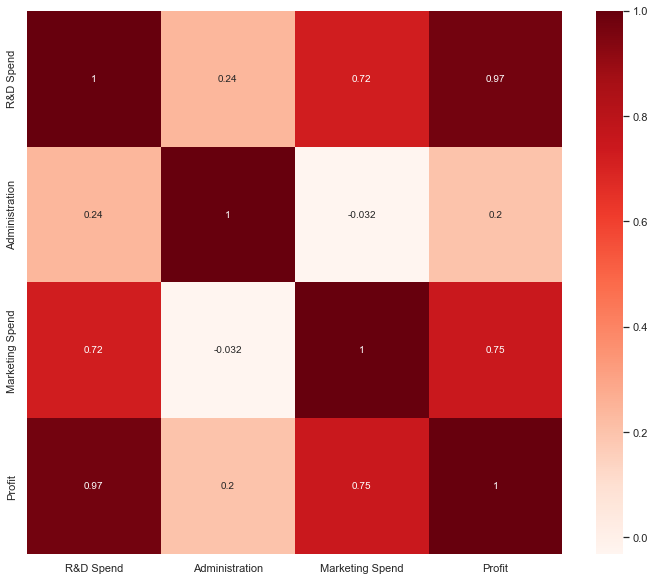

In [13]:
%matplotlib inline
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [14]:
corr_Profit=cor["Profit"].sort_values(ascending=False)
print(corr_Profit)

Profit             1.000000
R&D Spend          0.972900
Marketing Spend    0.747766
Administration     0.200717
Name: Profit, dtype: float64


In [15]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

R&D Spend           61666.4300
Administration      41111.3050
Marketing Spend    170168.9525
Profit              49627.0750
dtype: float64


In [16]:
print(dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))

    Administration  Marketing Spend  Profit  R&D Spend  State
0            False            False   False      False  False
1            False            False   False      False  False
2            False            False   False      False  False
3            False            False   False      False  False
4            False            False   False      False  False
5            False            False   False      False  False
6            False            False   False      False  False
7            False            False   False      False  False
8            False            False   False      False  False
9            False            False   False      False  False
10           False            False   False      False  False
11           False            False   False      False  False
12           False            False   False      False  False
13           False            False   False      False  False
14           False            False   False      False  False
15      

C:\Users\FORMUL~1\AppData\Local\Temp/ipykernel_3560/2851769225.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print(dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))
C:\Users\FORMUL~1\AppData\Local\Temp/ipykernel_3560/2851769225.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print(dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))


TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [17]:
dataset_outl = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset_outl.shape

C:\Users\FORMUL~1\AppData\Local\Temp/ipykernel_3560/3270973968.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataset_outl = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]


(49, 5)

D:\dimas\py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


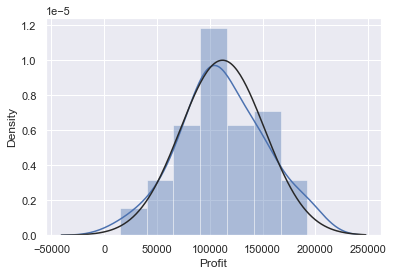

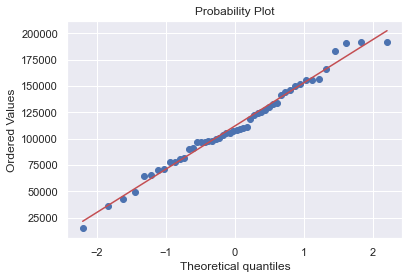

In [18]:
#Normality
#histogram and normal probability plot
from scipy.stats import norm
from scipy import stats
sns.distplot(dataset['Profit'], fit=norm);
fig = plt.figure()
res = stats.probplot(dataset['Profit'], plot=plt)

In [19]:
# splitting the dataset into  independent variable X and dependent(target) y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [20]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
 
ct = ColumnTransformer([('encoder', OneHotEncoder(),[3])], remainder='passthrough')
 
X = np.array(ct.fit_transform(X), dtype=np.float)

C:\Users\FORMUL~1\AppData\Local\Temp/ipykernel_3560/3098935888.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.array(ct.fit_transform(X), dtype=np.float)


In [21]:
X = X[:, 1:]

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# drop the 1 column in X
RFE_regressor = LinearRegression()
#Initializing RFE model
rfe = RFE(RFE_regressor, 2)# random number(2)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
RFE_regressor.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False False]
[1 1 2 3 4]


D:\dimas\py\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [23]:
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
#no of features
nof_list=np.arange(1,4)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 3
Score with 3 features: 0.935552


D:\dimas\py\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\dimas\py\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\dimas\py\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [24]:
#Initializing RFE model
rfe = RFE(RFE_regressor, 3)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
RFE_regressor.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True False False]
[1 1 1 2 3]


D:\dimas\py\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [25]:
RFE_features=X[:,[0,1,2]]

In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
print("score: ",regressor.score(X_train,y_train))
print("Model slope:    ", regressor.coef_)
print("Model intercept:", regressor.intercept_)

score:  0.951557126270021
Model slope:     [4.63028992e+02 3.04799573e+02 7.90840255e-01 3.01968165e-02
 3.10148566e-02]
Model intercept: 42403.870870548926


In [28]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print("score: ",regressor.score(X_test,y_test))
print("Model slope:    ", regressor.coef_)
print("Model intercept:", regressor.intercept_)

score:  0.9358680970046506
Model slope:     [4.63028992e+02 3.04799573e+02 7.90840255e-01 3.01968165e-02
 3.10148566e-02]
Model intercept: 42403.870870548926


In [1]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df

NameError: name 'regressor' is not defined

In [2]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df

NameError: name 'regressor' is not defined